# Probability simulations 

https://rafalab.github.io/dsbook/probability.html#discrete-probability

https://rafalab.github.io/dsbook/probability.html#combinations-and-permutations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from multiprocessing import Pool, cpu_count
from datetime import date, timedelta
from IPython.display import display, Markdown, Latex

# select a random seed 
np.random.seed(23)

## Urn problem

Create a urn with 5 balls, 2 balls are red and 3 balls are blue. 

In [2]:
x = np.array(["red", "blue"])
beads = np.repeat(x, [2, 3], axis=0)
print(beads)

['red' 'red' 'blue' 'blue' 'blue']


What is the chance of picking a blue ball?

In [3]:
print(np.mean(beads == 'blue'))

0.6


Let us simulate this event 10000 times and get the empirical probability of picking a blue ball. 

In [4]:
events = np.random.choice(beads,replace=True,size=10000)
print(events)

['blue' 'red' 'red' ... 'red' 'red' 'blue']


In [5]:
num, count = np.unique(events, return_counts=True)
freq = np.asarray((num, count)).T
print(freq)

[['blue' '5967']
 ['red' '4033']]


In [6]:
print("The probability of picking a blue ball is ", np.mean(events == 'blue'))

The probability of picking a blue ball is  0.5967


## Flip coins 

In [7]:
coin = ['head','tail']

n_trails = 10000

events = np.random.choice(coin, n_trails)

print('The probability of seeing "head" is', np.mean(events=='head'))

The probability of seeing "head" is 0.5024


If you flip a coin 8 times:
- What is the probability of getting exactly 3 heads?
- What is the probability of getting more than 5 heads?

In [8]:
coin = [1,0] # head = 1, tail = 0 

n_flips = 8 

events = np.random.choice(coin, size=(n_trails, n_flips))
prob = np.mean(events.sum(axis=1) == 3)
print(f'The probability of getting exactly 3 heads is {prob}.')

The probability of getting exactly 3 heads is 0.2196.


In [9]:
prob = np.mean(events.sum(axis=1) > 5)
print(f'The probability of getting more than 5 heads is {prob}.')

The probability of getting more than 5 heads is 0.1485.


#### Sequence of coin flips 

If you flip a coin 4 times and recond the sequence:
- What is the probability of getting 3 consecutive heads?
- What is the probability of getting head-tail-head?

In [10]:
coin = ['H','T']

# start with simpler sequence then move to larger sequence 
n_flips = 4 

events = np.random.choice(coin, size=(n_trails, n_flips))
sequence = [''.join(i) for i in events.astype(str)]
sequence[:9]

['TTTH', 'THHT', 'TTHT', 'TTHT', 'HTHT', 'THHT', 'HTTH', 'HTTH', 'HTHT']

In [11]:
np.mean(pd.Series(sequence).str.contains('HHH'))

0.182

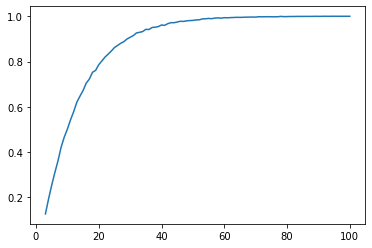

In [12]:
sim_p = []
for i in range(3,101):
    events = np.random.choice(coin, size=(n_trails,i))
    sequence = [''.join(c) for c in events.astype(str)]
    p = np.mean(pd.Series(sequence).str.contains('HHH'))
    sim_p.append(p)
    
plt.plot(np.arange(3,101), sim_p)
# plt.axvline(x=17, color='r')
plt.show()

#### Unbalanced coin, binomial 

If you flip an unbalanced coin twice (p_head = 0.25, p_tail = 0.75), what is the probability of seeing a second head?

In [13]:
coin = [1,0] # head = 1, tail = 0 
n_trails = 50000

events = np.random.choice(coin, size=(n_trails,2), p=[0.25, 0.75])
prob = np.mean(events.sum(axis=1) == 2)
print(f'The probability of seeing two heads is {prob}.')

The probability of seeing two heads is 0.062.


In [14]:
events

array([[1, 1],
       [0, 1],
       [0, 0],
       ...,
       [0, 1],
       [0, 0],
       [0, 0]])

In [15]:
prob = np.sum(events.sum(axis=1) == 2) / np.sum(events[:,0]==1)
print(f'The conditional probability of seeing a second head is {prob}.')

The conditional probability of seeing a second head is 0.2493163905420621.


Theoretically, the conditional probability should be  0.25, as each coin flip is independent. 

## Playing poker 

Generate a poker pool of 13 x 4 = 52 cards. 

In [16]:
from itertools import product, permutations, combinations 

def expand_grid(*itrs):
    prod = list(product(*itrs))
    return prod

In [17]:
suits = ["Diamonds", "Clubs", "Hearts", "Spades"]
numbers = ["Ace", "Deuce", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine", "Ten", "Jack", "Queen", "King"]
deck = expand_grid(numbers, suits)
deck = ['_'.join(tups) for tups in deck] 
deck[:10]

['Ace_Diamonds',
 'Ace_Clubs',
 'Ace_Hearts',
 'Ace_Spades',
 'Deuce_Diamonds',
 'Deuce_Clubs',
 'Deuce_Hearts',
 'Deuce_Spades',
 'Three_Diamonds',
 'Three_Clubs']

In [18]:
kings = [i for i in deck if 'King' in i] 
print(kings) 

['King_Diamonds', 'King_Clubs', 'King_Hearts', 'King_Spades']


In [19]:
prob_king = np.mean(pd.Series(deck).isin(kings))
print("The probability of picking a 'King' is %.3f"%prob_king)

The probability of picking a 'King' is 0.077


In [20]:
np.random.choice(deck)

'Four_Hearts'

In [21]:
check =  any(item in kings for item in deck)
check

True

In [22]:
hands = list(permutations(deck,2))
hands[:10]

[('Ace_Diamonds', 'Ace_Clubs'),
 ('Ace_Diamonds', 'Ace_Hearts'),
 ('Ace_Diamonds', 'Ace_Spades'),
 ('Ace_Diamonds', 'Deuce_Diamonds'),
 ('Ace_Diamonds', 'Deuce_Clubs'),
 ('Ace_Diamonds', 'Deuce_Hearts'),
 ('Ace_Diamonds', 'Deuce_Spades'),
 ('Ace_Diamonds', 'Three_Diamonds'),
 ('Ace_Diamonds', 'Three_Clubs'),
 ('Ace_Diamonds', 'Three_Hearts')]

In [23]:
kings2 = [(i,j) for i,j in hands if 'King' in i and 'King' in j] 
kings2

[('King_Diamonds', 'King_Clubs'),
 ('King_Diamonds', 'King_Hearts'),
 ('King_Diamonds', 'King_Spades'),
 ('King_Clubs', 'King_Diamonds'),
 ('King_Clubs', 'King_Hearts'),
 ('King_Clubs', 'King_Spades'),
 ('King_Hearts', 'King_Diamonds'),
 ('King_Hearts', 'King_Clubs'),
 ('King_Hearts', 'King_Spades'),
 ('King_Spades', 'King_Diamonds'),
 ('King_Spades', 'King_Clubs'),
 ('King_Spades', 'King_Hearts')]

In [24]:
prob_kings2 = np.mean(pd.Series(hands).isin(kings2)) 
print("The probability of picking two 'King's is %.4f"%prob_kings2)

The probability of picking two 'King's is 0.0045


In [25]:
cprob_king2 = np.mean(pd.Series(hands).isin(kings2)) / np.mean(pd.Series(deck).isin(kings))
print("The condition probability of get a second king conditional on geting a first king is %.4f"%cprob_king2)

The condition probability of get a second king conditional on geting a first king is 0.0588


## Rolling dice 

In [26]:
dice = np.arange(1,7) 
# dice = [1,2,3,4,5,6]
n = 10000
k = 2 

# Generate n trials of k dice
rolls = np.random.choice(dice, size=(n,k))
df = pd.DataFrame(rolls)
df['doubles'] = df[0] == df[1]

number_of_doubles = df.doubles.sum()
chance = number_of_doubles / n 
print("The probability of rolling doubles on two dice is %.3f"%chance)

The probability of rolling doubles on two dice is 0.164


How many dice must be rolled to have at least 95% chance of rolling a six?

In [27]:
n_trails = 10000
n_dice = 17
p_target = 0.95 

In [28]:
rolls = np.random.choice(dice, size=(n_trails, n_dice))
df = pd.DataFrame(rolls)
df['has_six']  = [np.sum(df.iloc[i,:]==6) > 0 for i in range(df.shape[0])]
prob = np.mean(df.has_six)
prob

0.9558

Theoretically, the probability that none of dice turn up six is $(5/6)^n$, so the probability that at least one is six is $1-(5/6)^n$. 

Solving $1-(5/6)^n \geq 0.95$, we have $n \geq 17$.

## Birthday probability 

https://en.wikipedia.org/wiki/Birthday_problem

https://codecalamity.com/the-birthday-paradox-the-proof-is-in-the-python/

To compute the probability that at least two people in the class have the same birthday, we first calculate the probability that all people have different birthdays. 

\begin{equation}
\begin{aligned}
  P'(\text{not shared birthdays}) = 1 - P(\text{shared birthdays})
\end{aligned}
\end{equation}



\begin{equation}
\begin{aligned}
  P'(n) &= 1 * (1-\frac{1}{365}) * (1-\frac{2}{365}) * (1-\frac{3}{365}) ... * (1-\frac{n-1}{365}) \\
        &= \frac{365!}{365^n * (365-n)!}
\end{aligned}
\end{equation}

In [29]:
import math 

def atleast2_same_birthday_prob(n):
    return 1 - math.factorial(365) / math.factorial(365-n) / math.pow(365,n)

atleast2_same_birthday_prob(23)

0.5072972343239854

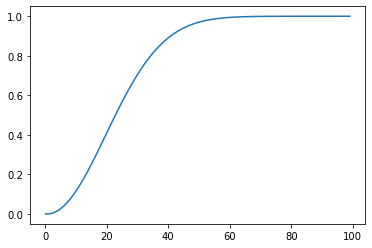

In [30]:
theoretic_prob = []
for i in range(100):
    theoretic_prob.append(atleast2_same_birthday_prob(i))

plt.plot(np.arange(100),theoretic_prob )
plt.show()

In [31]:
birthdays = np.arange(1,366)

n_trials = 10000
num_stu = 23

events = np.random.choice(birthdays, size=(n_trials, num_stu))
df = pd.DataFrame(events)
df['unique_birthday'] = df.nunique(axis=1)
df['has_same_birthday'] = df.unique_birthday < num_stu

print('The chance of having at least 2 students share the same birthday is', df.has_same_birthday.mean())

The chance of having at least 2 students share the same birthday is 0.5117


In [32]:
def random_birthdays(number_of_people):
    first_day_of_year = date(2017, 1, 1)
    return [first_day_of_year + timedelta(days=np.random.randint(0, 365))
            for _ in range(number_of_people)]


def determine_probability(number_of_people, run_amount=1000):
    dups_found = 0
    for _ in range(run_amount):
        birthdays = random_birthdays(number_of_people)
        duplicates = set(x for x in birthdays if birthdays.count(x) > 1)
        if len(duplicates) >= 1:
            dups_found += 1

    return number_of_people, dups_found/run_amount * 100


def plot_yearly_probabilities(max_people, vertical_markers=(23, 70)):
    with Pool(processes=cpu_count()) as p:
        percent_chances = p.map(determine_probability, range(max_people))

    plt.plot([z[1] for z in sorted(percent_chances, key=lambda x: x[0])])
    plt.xlabel("Number of people")
    plt.ylabel('Chance of sharing a birthday (Percentage)')

    for marker in vertical_markers:
        if max_people >= marker:
            plt.axvline(x=marker, color='red')

    plt.show()

In [33]:
# plot_yearly_probabilities(100)

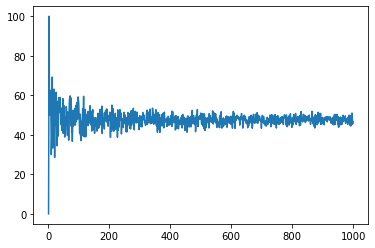

In [34]:
sim_p = []
for i in range(1,1000):
    _, p = determine_probability(22, run_amount=i)
    sim_p.append(p)
    
plt.plot(np.arange(1,1000), sim_p)

## Monty Hall Problem 

https://rosettacode.org/wiki/Monty_Hall_problem#Python_3_version

https://scipython.com/book/chapter-4-the-core-python-language-ii/examples/the-monty-hall-problem/

In [35]:
def monty_hall_prob(n):
    stay = 0 
    switch = 0 

    for i in range(n):
        lst = [1,0,0]
        np.random.shuffle(lst)

        ran = np.random.randint(3)
        user = lst[ran]
        del(lst[ran])

        huh = 0 
        for i in lst:
            if i == 0:
                del(lst[huh])
                break
            huh += 1 

        if user == 1:
            stay += 1 

        if lst[0] == 1:
            switch += 1 

    return stay/n, switch/n

monty_hall_prob(10000)

(0.3335, 0.6665)

## Casino gamble

In [36]:
def casino_simu(b):
    s = []
    for i in range(b):
        x = np.random.choice([-1,1], p=[9/19, 10/19], size=1000, replace=True)
        s.append(x.sum())
    return s 

s = casino_simu(10000)
np.mean(s), np.std(s), np.min(s), np.max(s) 

(52.5074, 31.492699872192606, -72, 176)

In [37]:
import scipy.stats as scs 

scs.norm.cdf(0, 52, 31)

0.04673025360293572

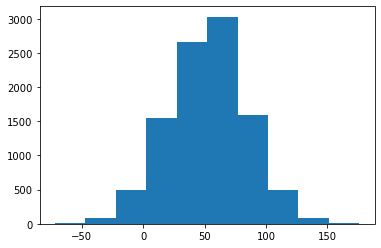

In [38]:
plt.hist(s)
plt.show()

## Default rate 

In [39]:
def default_simu(b):
    s = []
    for i in range(b):
        defaults = np.random.choice([0,1], p=[1-pd, pd], size=n, replace=True)
        s.append(np.sum(defaults*loss))
    return s 

In [40]:
n = 1000
loss = -200000
pd = 0.02 
loan = 180000

s = default_simu(10000)
np.mean(s), np.std(s) 


(-3998320.0, 886352.7388122631)

In [41]:
mu = n*loss*pd
sde = math.sqrt(n) * abs(loss) * math.sqrt(pd*(1-pd))
mu, sde

(-4000000.0, 885437.7448471461)

In [42]:
loan_rates = -loss*pd/(1-pd)
loan_rates/loan

0.022675736961451247

In [43]:
z = scs.norm.ppf(0.01)

In [44]:
loan_rates = -loss*( n*pd - z*math.sqrt(n*pd*(1-pd)))/ ( n*(1-pd) + z*math.sqrt(n*pd*(1-pd)))
loan_rates

6249.181290832119

## Insurance premium

Use the information below as you answer this 6-part question.

An insurance company offers a one-year term life insurance policy that pays \\$150,000 in the event of death within one year. The premium (annual cost) for this policy for a 50 year old female is \\$1,150. Suppose that in the event of a claim, the company forfeits the premium and loses a total of \\$150,000, and if there is no claim the company gains the premium amount of \\$1,150. The company plans to sell 1,000 policies to this demographic.

The loss in the event of the policy holder's death is -\\$150,000 and the gain if the policy holder remains alive is the premium \\$1,150.


In [45]:
loss = -150000
premium = 1150 
n = 1000
pd_f = 0.003193
pd_m = 0.005013 

What is the expected value of the company's net profit on one policy for a 50 year old female? 

What is the standard error of the profit on one policy for a 50 year old female? 

In [46]:
profit = premium * (1-pd_f) + loss * pd_f
profit_se = (premium - loss) * math.sqrt(pd_f*(1-pd_f))
profit, profit_se

(667.37805, 8527.331575345139)

What is the expected value of the company's profit over all 1,000 policies for 50 year old females?

What is the standard error of the sum of the expected value over all 1,000 policies for 50 year old females?

In [47]:
profits = (premium * (1-pd_f) + loss * pd_f) * n 
profits_se = (premium - loss) * math.sqrt(n*pd_f*(1-pd_f))
profits, profits_se

(667378.05, 269657.90141562367)

Use the Central Limit Theorem to calculate the probability that the insurance company loses money on this set of 1,000 policies.

In [48]:
scs.norm.cdf(0,profits, profits_se)

0.006663556018918071

50 year old males have a different probability of death than 50 year old females. We will calculate a profitable premium for 50 year old males in the following four-part question.

Suppose the company wants its expected profits from 1,000 number of 50 year old males with \\$150,000 life insurance policies to be \\$700,000. 

What premium should be charged?

Using the new 50 year old male premium rate, calculate the standard error of the sum of 1,000 premiums.

What is the probability of losing money on a series of 1,000 policies to 50 year old males?

In [49]:
profits = (premium * (1-pd_m) + loss * pd_m) * n 
profits_se = (premium - loss) * math.sqrt(n*pd_m*(1-pd_m))
profits, profits_se

(392285.04999999993, 337571.448358783)

In [50]:
targetprofits = 700000
new_premium = (targetprofits/n - loss * pd_m) / (1-pd_m)
new_premium

1459.265296933528

In [51]:
new_premium - premium

309.2652969335279

In [52]:
new_se = (new_premium - loss) * math.sqrt(n*pd_m*(1-pd_m))
new_se

338262.1472288654

In [53]:
scs.norm.cdf(0,targetprofits, new_se)

0.019254239946609984